# THE SPARKS FOUNDATION - GRIPJUNE24

# DATA SCIENCE AND BUSINESS ANALYTICS

# NAME: SANIYA JOSEPH

# TASK 2 : Prediction Using Unsupervised ML (Level - Beginner)

#### <font color=black>Problem statement: From the given "Iris" dataset,predict the optimum  number of clusters and rerpresent it visually.</font> 

# Step-1:- Importing required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import silhouette_score
import warnings as wg
wg.filterwarnings('ignore')
from pylab import rcParams

# Step-2:- Reading in the data from the source.

In [2]:
data=pd.read_csv(r"F:/GRIP/TASK 2/Iris.csv")
data.head(10)#printing head of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Step-3:- Finding some properties of the data

In [3]:
data.shape

(150, 6)

In [4]:
#checking for null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.info()#checking the shape of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#finding statistical properties of the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Step-4:- Preparation of the data.

In [7]:
iris=pd.DataFrame(data)
iris_df=iris.drop(columns=["Species","Id"])#dropping the columns of Id and Species
#displaying the rearranged data
print(iris_df.head())
print(iris_df.tail())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8


# Step-5:- Cheking for ouliers and removing them

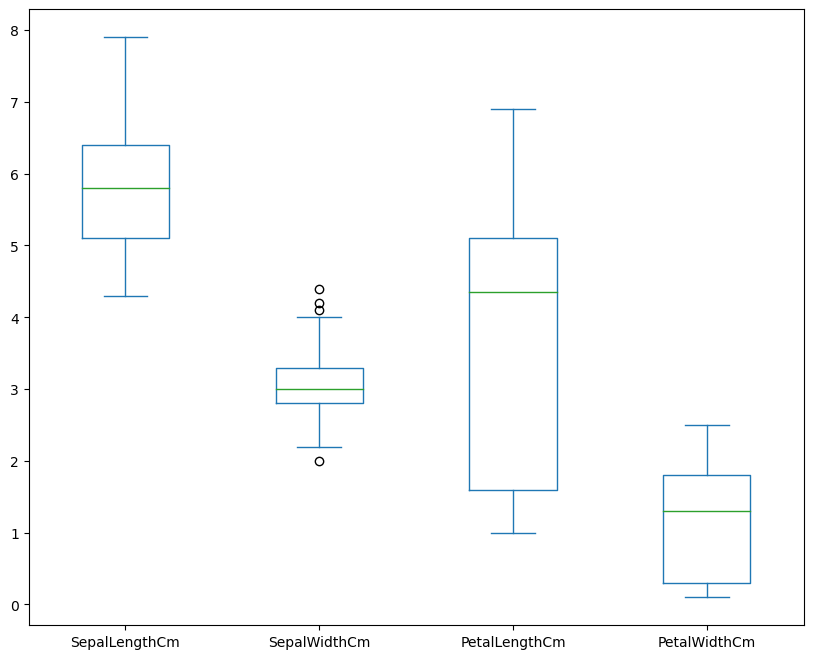

In [8]:
#checking for outliers by boxplot
plt.rcParams["figure.figsize"]=(10,8)
iris_df.plot(kind="box")
plt.show()

Only SepalWidth has some outliers. We now remove the outliers as the clusters are very sensitive to outliers and tend to take the clusters towards them.

In [9]:
#removing the ouliers using IQR method
Q1=iris_df.quantile(0.25)
Q3=iris_df.quantile(0.75)
IQR=Q3-Q1
iris_df=iris_df[~((iris_df<(Q1-1.5*IQR)) | (iris_df>(Q3+1.5*IQR))).any(axis=1)]

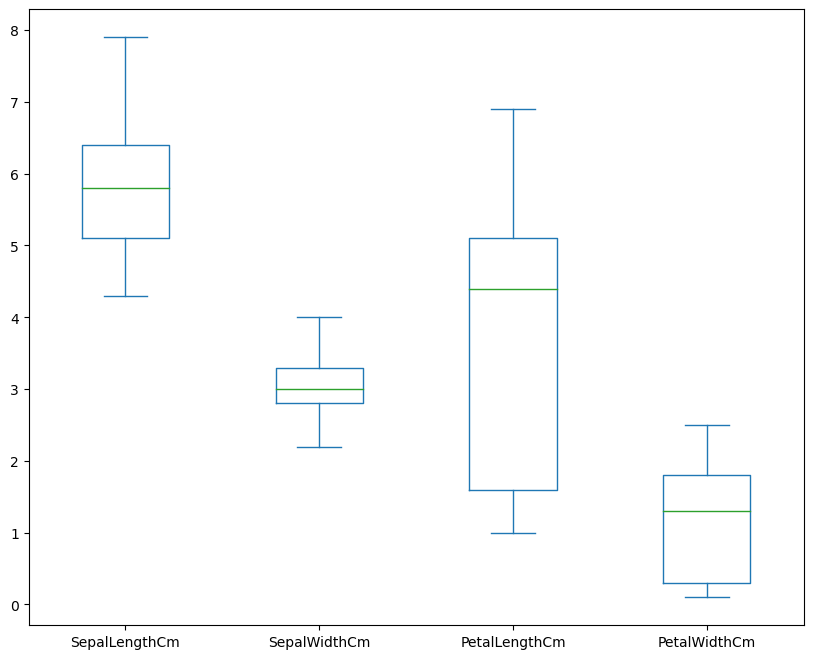

In [10]:
#plotting the boxplot after removing the outliers
plt.rcParams["figure.figsize"]=(10,8)
iris_df.plot(kind="box")
plt.show()

Now our data is free of outliers.

# Step-6:- K-Means clustering  

Let us perform the centroid-based clustering algorithm calles K-Means clustering. Such algorithms are efficient but sensitive to initial conditions and outliers.

Here we consider two techniques- the Elbow method and the silhouette score method to decide on the optimum number of clusters(k) to perform the K-Means clustering.

## Optimal value of k using Elbow plot

In [11]:
x=iris_df.iloc[:,[0,1,2,3]].values #data arrangement

In [12]:
from sklearn.cluster import KMeans
#create several cluster combinations and observe the wcss(Within Cluster Sum of Squares)
wcss=[] #empty list to store the wcss
K=range(1,11)
for i in K:
    kmeans=KMeans(n_clusters=i,init='k-means++',
                  max_iter=300,n_init=10,random_state=0)
    kmeans=kmeans.fit(x)  #fit the model on prepared data
    wcss.append(kmeans.inertia_) #returns wcss for specific value of k
wcss    

[655.0325342465757,
 143.86007499999994,
 73.51656472013657,
 53.30487780732859,
 42.54863475177304,
 36.5081884057971,
 31.863827294685986,
 28.35457225981718,
 26.344976284584977,
 24.81021346407216]

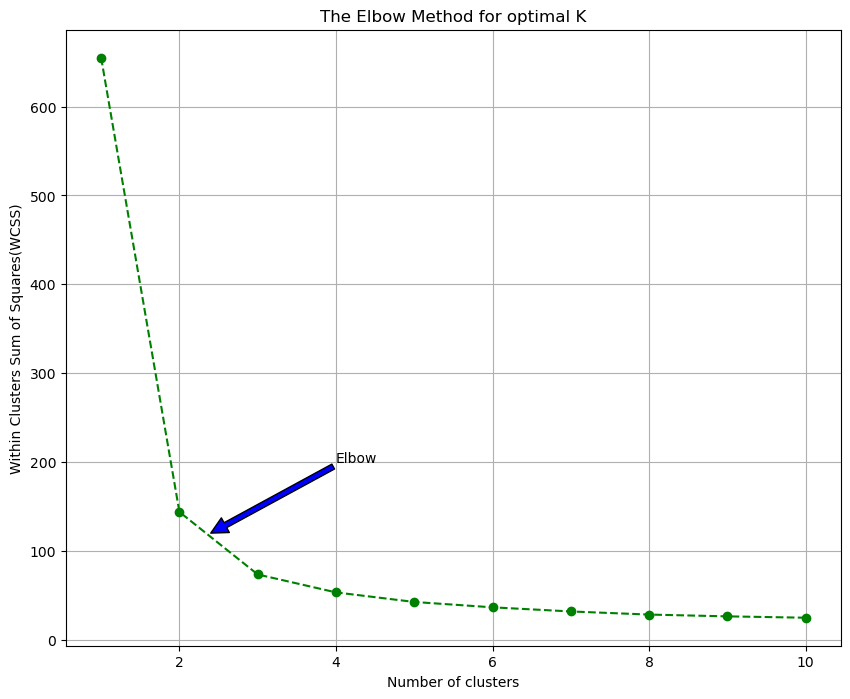

In [13]:
#visualize the elbow plot to find the optimal value of k
plt.plot(K,wcss,"go--")
#setting the plot title and axis labels
plt.title("The Elbow Method for optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Within Clusters Sum of Squares(WCSS)")
plt.annotate("Elbow",xytext=(4,200),xy=(2.4,120),arrowprops={"facecolor":"blue"})
plt.grid()
plt.show()#display the plot

Elbow plot is plotted with the value of k on the x-axis and the WCSS(Within Clusters Sum of Squares) on the y-axis.
The value of k corresponding to the Elbow point represents the optimal value for k.

In the above plot, the Elbow point is representated by the arrow and the elbow occurs by 3 points. 

Hence, the Elbow method shows that optimum value for k is 3.

# Optimum value of k using Silhouette plot 

In [19]:
# initialise kmeans
kmeans = [KMeans(n_clusters=k,random_state=42).fit(x) for k in range(2,11)]
s=[silhouette_score(x, model.labels_) 
   for model in kmeans[1:]]

In [21]:
pip install yellowbrick


  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ------------------------------------ --- 256.0/282.6 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


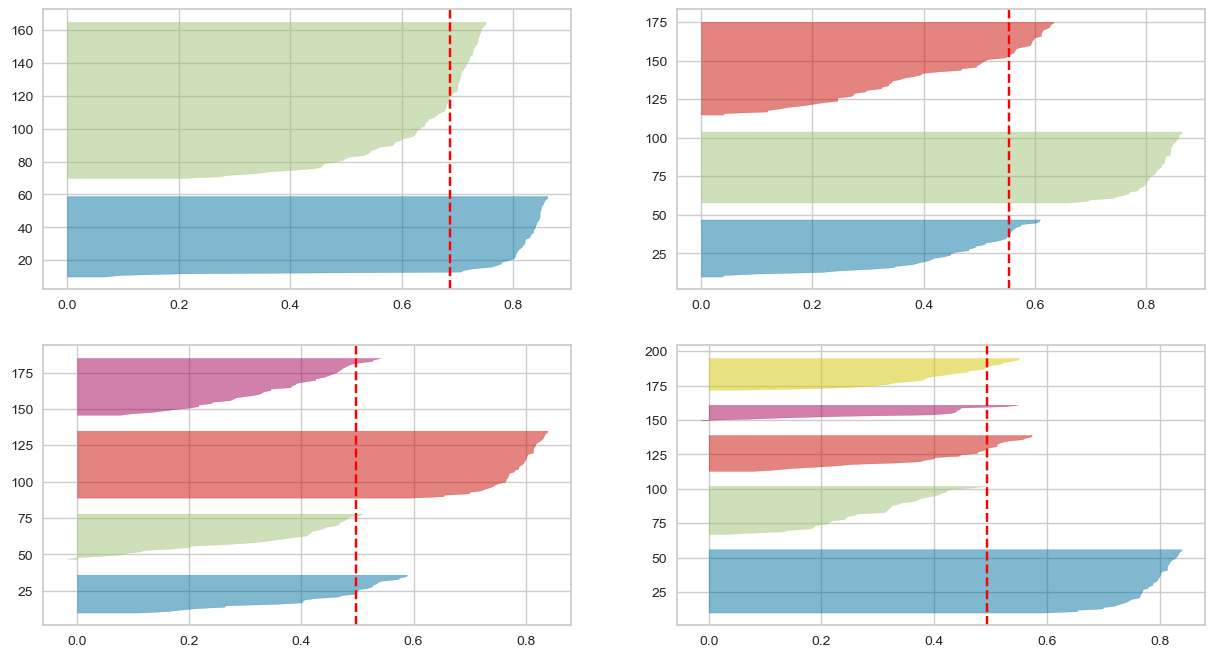

In [22]:
#plotting silhoutte visualiser
from yellowbrick.cluster import SilhouetteVisualizer

fig,ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
    #Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km_labels=km.fit_predict(x)
    q, mod = divmod(i, 2)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)
    

The Silhouette plots for 2,3,4,5 clusters is shown above.

The silhouette plot shows that the value of k is 4 and 5 is a bad pick, as all the points in the cluster are below-average silhouette scores.

Silhouette analysis is more ambivalent in deciding between 2 and 3.
The thickness of the silhouette plot for value of k=2, the second cluster is bigger in size owing to the grouping of the 3 sub-clusters into one big cluster.

For value of k=3, all the plots are more or less of similar thickness and hence are of similar sizes,also silhouette scores are well above average and so can be considered as best ‘k’.

In [ ]:
#plotting the silhouette score
plt.plot(range(3,11),s)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In the above plot, we see the optimum value of silhouette score is when value of k is 3.
Hence, combining the above two plots, the silhouette method shows the optimum value of k is 3.

so, from above two techniques we choose the number of clusters as '3'.

# Step-7:- Visualizing the clusters.

In [16]:
# Creating the kmeans classifier
kmeans=KMeans(n_clusters=3,init='k-means++',
                  max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)   

y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

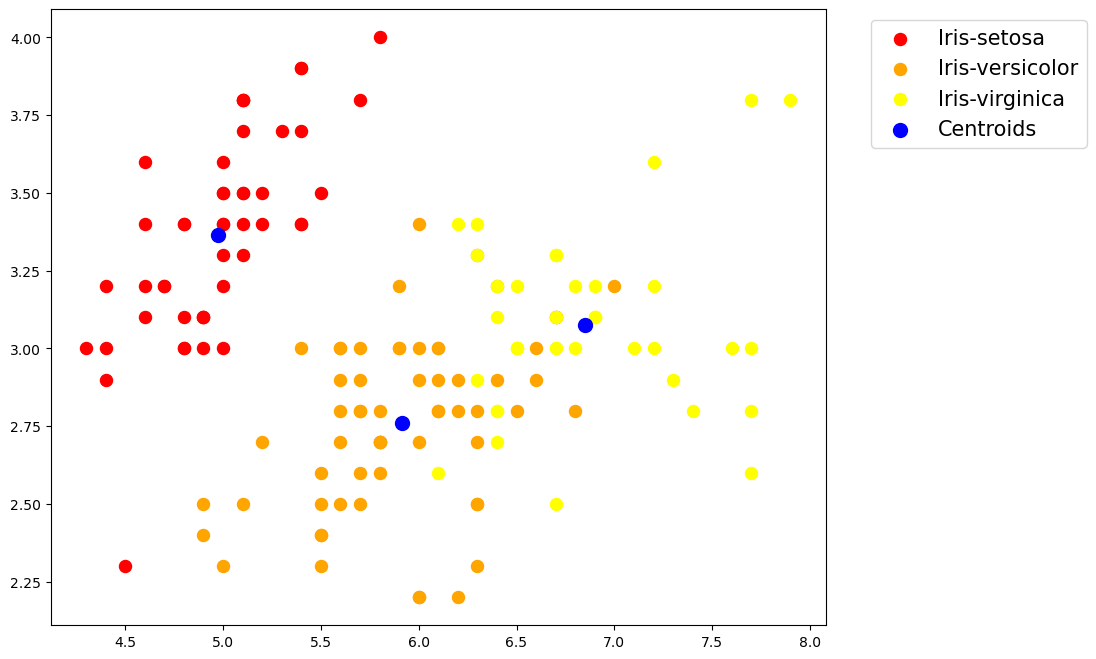

In [17]:
#Visualizing the clusters for the first two columns of the data
plt.scatter(x[ y_kmeans==0,0],x[ y_kmeans==0,1],s=75,c="red",label="Iris-setosa")
plt.scatter(x[ y_kmeans==1,0],x[ y_kmeans==1,1],s=75,c="orange",label="Iris-versicolor")
plt.scatter(x[ y_kmeans==2,0],x[ y_kmeans==2,1],s=75,c="yellow",label="Iris-virginica")
#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="blue",label="Centroids")
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":15})
plt.show()

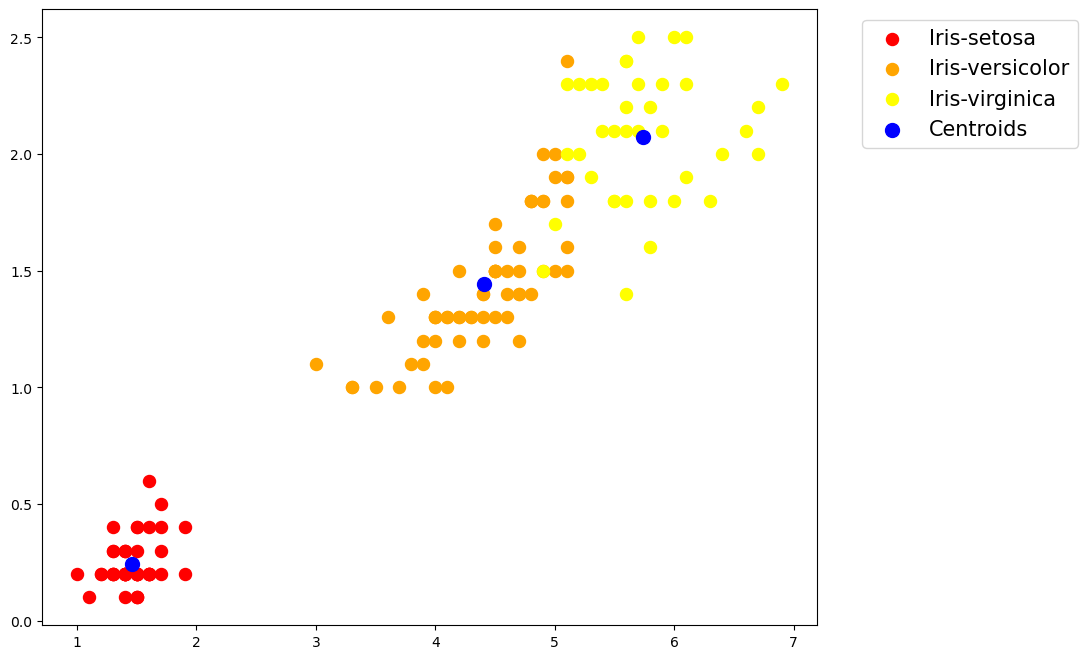

In [18]:
#Visualizing the clusters for the 3rd and 4th columns of the data
plt.scatter(x[ y_kmeans==0,2],x[ y_kmeans==0,3],s=75,c="red",label="Iris-setosa")
plt.scatter(x[ y_kmeans==1,2],x[ y_kmeans==1,3],s=75,c="orange",label="Iris-versicolor")
plt.scatter(x[ y_kmeans==2,2],x[ y_kmeans==2,3],s=75,c="yellow",label="Iris-virginica")
#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=100,c="blue",label="Centroids")
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":15})
plt.show()

Thus, we have predicted the optimum number of clusters and represented it visually.